# Proyek Akhir: Student Dashboard

- Nama: Mochammad Revi Fikri Wardana
- Email: mrevifikri@gmail.com
- Id Dicoding: revi_fikri

In [3]:
!pip install scikit-optimize

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

# Hyperparameter tuning with Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Early stopping and regularization
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso

# Statistical tests
from scipy import stats
from scipy.stats import chi2_contingency

# Model persistence
import joblib
import pickle

In [5]:
import pkg_resources

# List of only the used packages
packages = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'imbalanced-learn',  # for SMOTE
    'plotly',
    'streamlit',
    'scipy',
    'scikit-optimize',
]

with open('requirements.txt', 'w') as f:
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            f.write(f"{pkg}=={version}\n")
        except Exception as e:
            print(f"Error getting version for {pkg}: {e}")


Error getting version for streamlit: The 'streamlit' distribution was not found and is required by the application


In [6]:
# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# Load the dataset
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(url, sep=";")

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.to_excel('students_performance.xlsx', index=False)

## Data Understanding

In [9]:
df.shape

(4424, 37)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [11]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
print("\nJumlah nilai yang hilang di dataset")
print(df.isnull().sum())


Jumlah nilai yang hilang di dataset
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enroll

In [13]:
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [14]:
df['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [15]:
print(f"\n🎯 TARGET VARIABLE DISTRIBUTION:")
print(df['Status'].value_counts())
print(f"Dropout rate: {df['Status'].value_counts()['Dropout'] / len(df) * 100:.2f}%")


🎯 TARGET VARIABLE DISTRIBUTION:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Dropout rate: 32.12%


## EDA

In [16]:
# Create comprehensive visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Target Distribution', 'Age Distribution by Status',
                   'Gender Distribution', 'Marital Status Distribution'),
    specs=[[{"type": "pie"}, {"type": "histogram"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Target distribution (pie chart)
status_counts = df['Status'].value_counts()
fig.add_trace(
    go.Pie(labels=status_counts.index, values=status_counts.values, name="Status"),
    row=1, col=1
)

# Age distribution by status
for status in df['Status'].unique():
    subset = df[df['Status'] == status]
    fig.add_trace(
        go.Histogram(x=subset['Age_at_enrollment'], name=f'Age - {status}', opacity=0.7),
        row=1, col=2
    )


# Gender distribution
gender_status = pd.crosstab(df['Gender'], df['Status'])
for status in gender_status.columns:
    fig.add_trace(
        go.Bar(x=gender_status.index, y=gender_status[status], name=f'Gender - {status}'),
        row=2, col=1
    )

# Marital status distribution
marital_status = pd.crosstab(df['Marital_status'], df['Status'])
for status in marital_status.columns:
    fig.add_trace(
        go.Bar(x=marital_status.index, y=marital_status[status], name=f'Marital - {status}'),
        row=2, col=2
    )

fig.update_layout(height=800, title_text="📊 Student Performance Analysis Dashboard")
fig.show()

TARGET VARIABLE ANALYSIS (EDA UNIVARIATE - CATEGORICAL)

In [17]:
# Target distribution
target_counts = df['Status'].value_counts()
target_pct = df['Status'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
for status, count in target_counts.items():
    percentage = target_pct[status]
    print(f"  {status}: {count:,} ({percentage:.1f}%)")

Target Variable Distribution:
  Graduate: 2,209 (49.9%)
  Dropout: 1,421 (32.1%)
  Enrolled: 794 (17.9%)


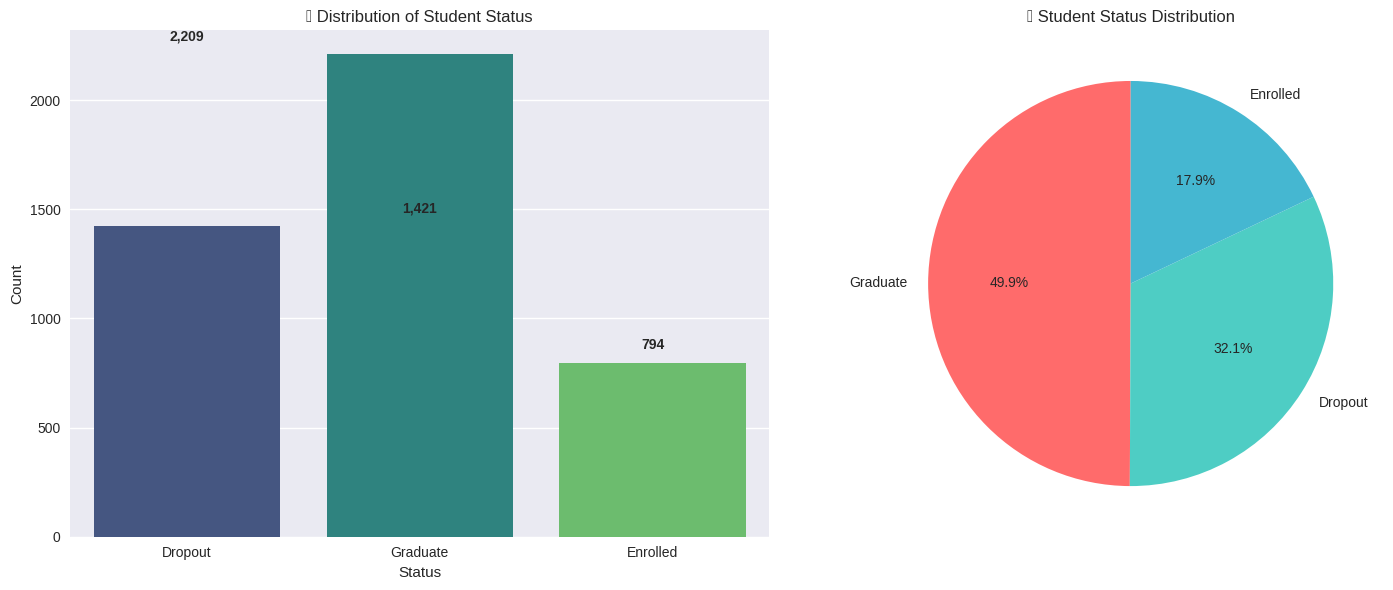

In [18]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='Status', ax=axes[0], palette='viridis')
axes[0].set_title('📊 Distribution of Student Status')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[1].set_title('🥧 Student Status Distribution')

plt.tight_layout()
plt.show()

NUMERICAL FEATURES ANALYSIS (EDA UNIVARIATE - NUMERICAL)

In [19]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Status' in numerical_cols:
    numerical_cols.remove('Status')

print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")

# Statistical summary
print("\nStatistical Summary of Numerical Features:")
print(df[numerical_cols].describe())

Numerical features (36): ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']

Statistical Summary of Nume

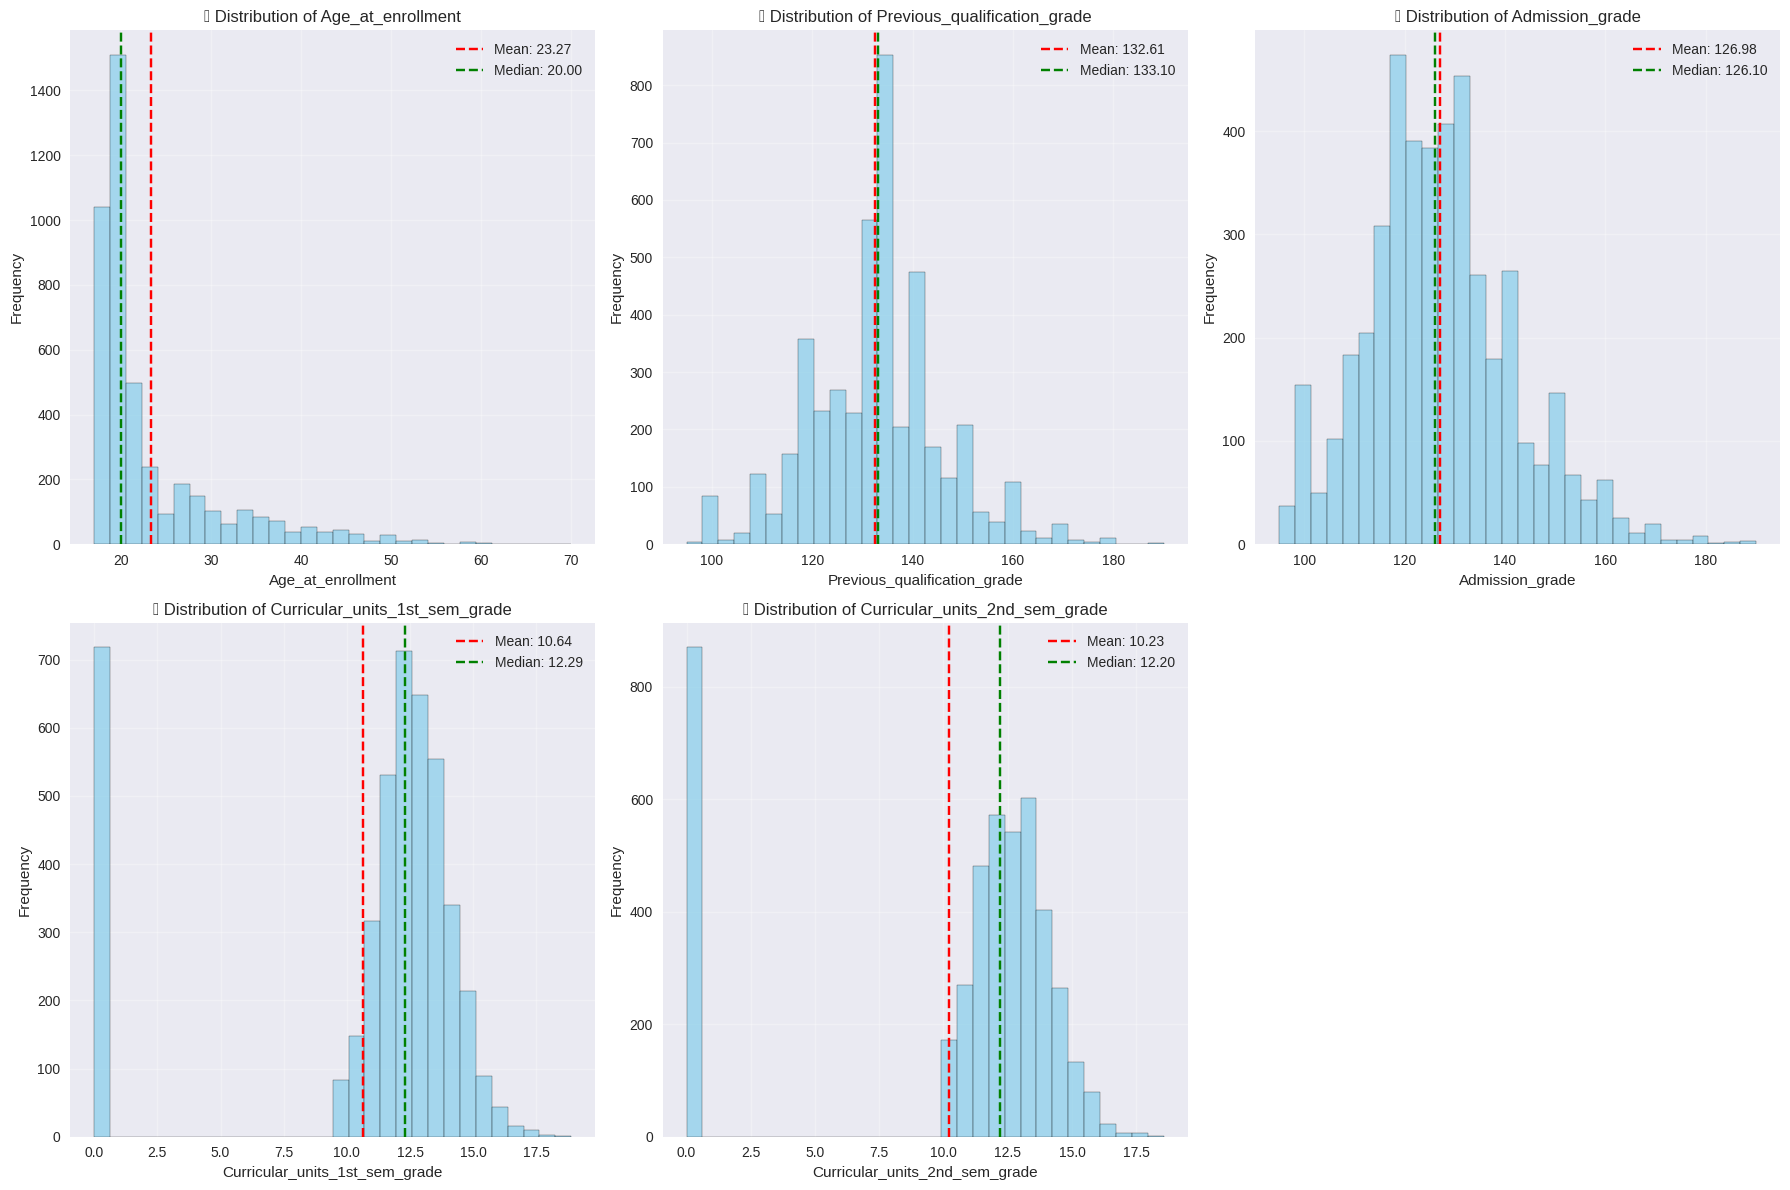

In [20]:
# Distribution analysis for key numerical features
key_numerical = ['Age_at_enrollment', 'Previous_qualification_grade', 'Admission_grade',
                'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

# Filter existing columns
key_numerical = [col for col in key_numerical if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_numerical[:6]):
    if i < len(key_numerical):
        # Histogram with KDE
        df[col].hist(bins=30, alpha=0.7, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--',
                       label=f'Mean: {df[col].mean():.2f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--',
                       label=f'Median: {df[col].median():.2f}')
        axes[i].set_title(f'📈 Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for j in range(len(key_numerical), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

CATEGORICAL FEATURES ANALYSIS (EDA UNIVARIATE - CATEGORICAL)

In [21]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Status' in categorical_cols:
    categorical_cols.remove('Status')

# Also check for numerical columns that might be categorical
potential_categorical = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'Status' and df[col].nunique() < 20:  # Arbitrary threshold
        potential_categorical.append(col)

print(f"Categorical features: {categorical_cols}")
print(f"Potential categorical (numerical with <20 unique values): {potential_categorical}")

Categorical features: []
Potential categorical (numerical with <20 unique values): ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


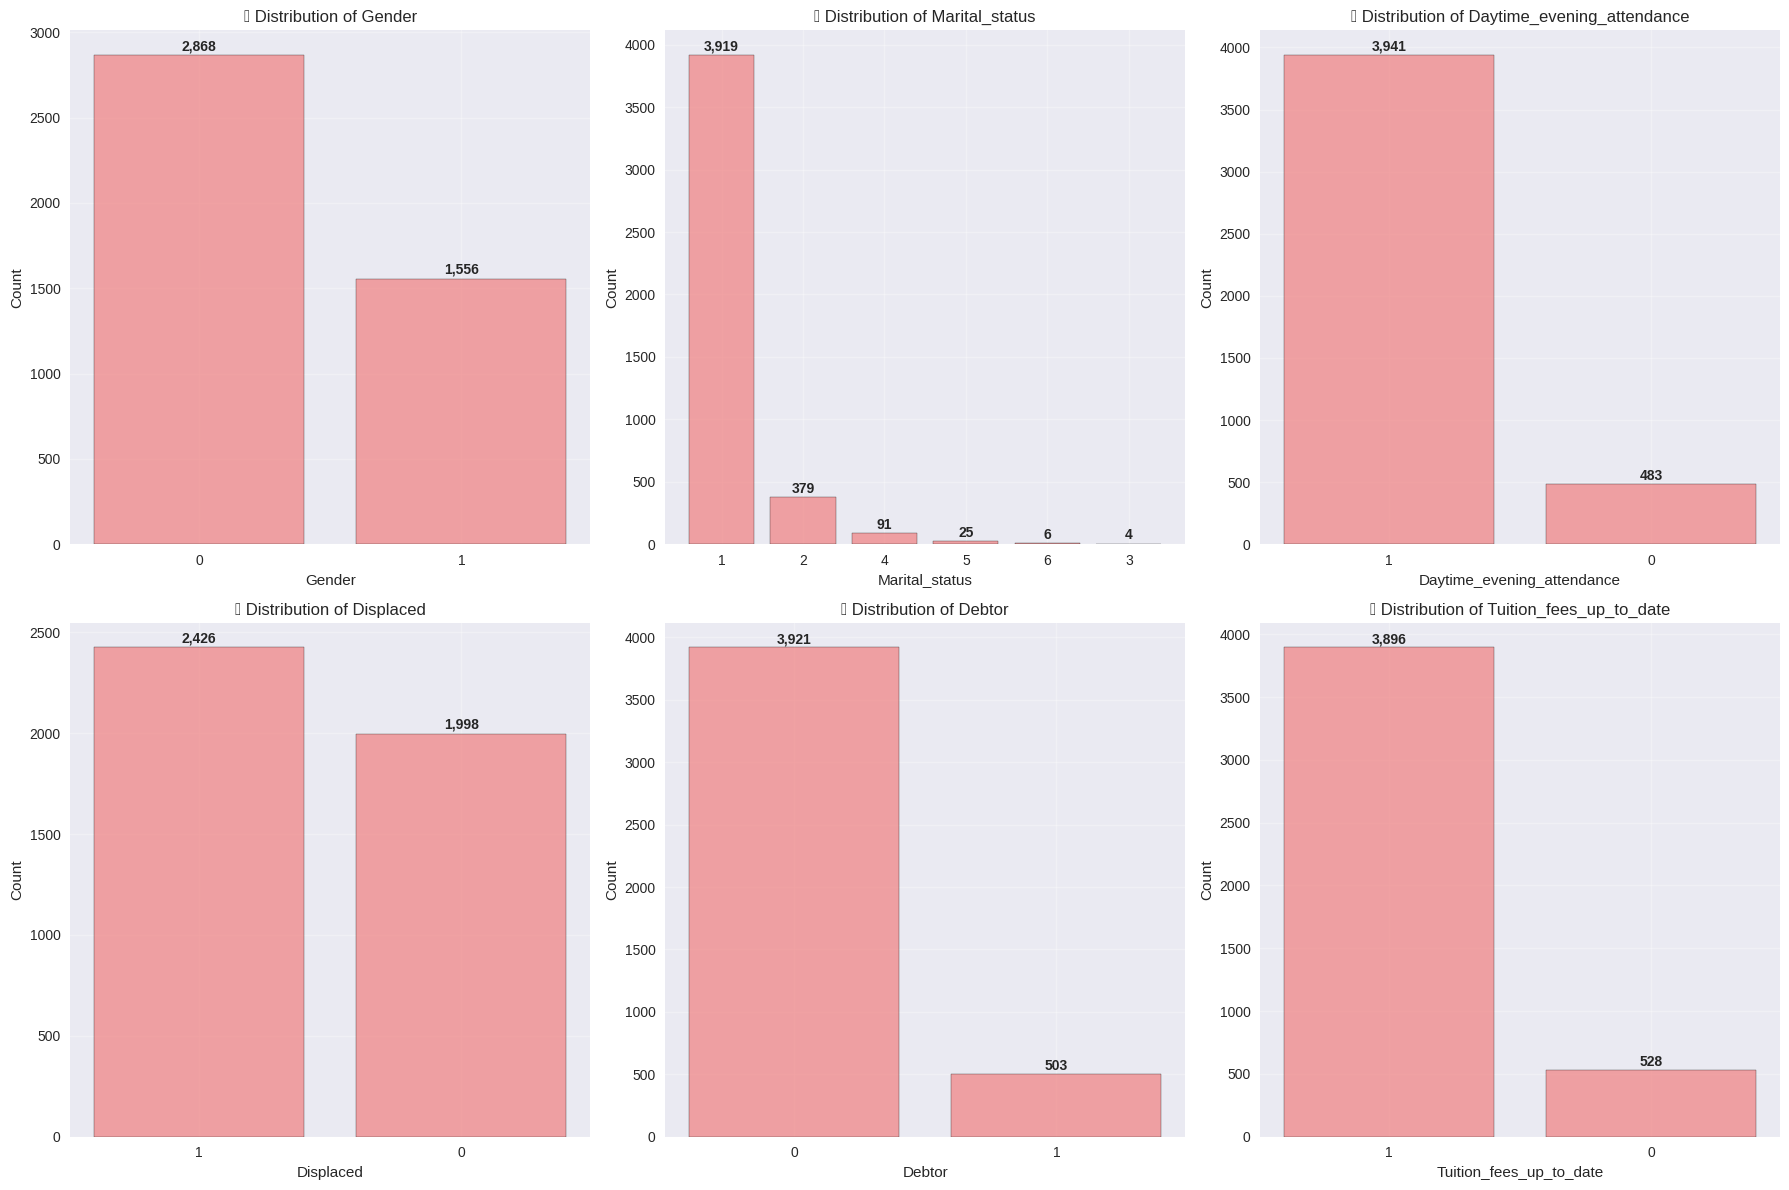

In [22]:
# Analyze categorical distributions
key_categorical = ['Gender', 'Marital_status', 'Daytime_evening_attendance',
                  'Displaced', 'Debtor', 'Tuition_fees_up_to_date']

# Filter existing columns
key_categorical = [col for col in key_categorical if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_categorical[:6]):
    if i < len(key_categorical):
        value_counts = df[col].value_counts()

        # Bar plot
        bars = axes[i].bar(range(len(value_counts)), value_counts.values,
                          color='lightcoral', alpha=0.7, edgecolor='black')
        axes[i].set_title(f'📊 Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index)

        # Add value labels on bars
        for bar, val in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                        f'{val:,}', ha='center', va='bottom', fontweight='bold')

        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for j in range(len(key_categorical), 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS (EDA MULTIVARIATE)

📈 Correlation Analysis:


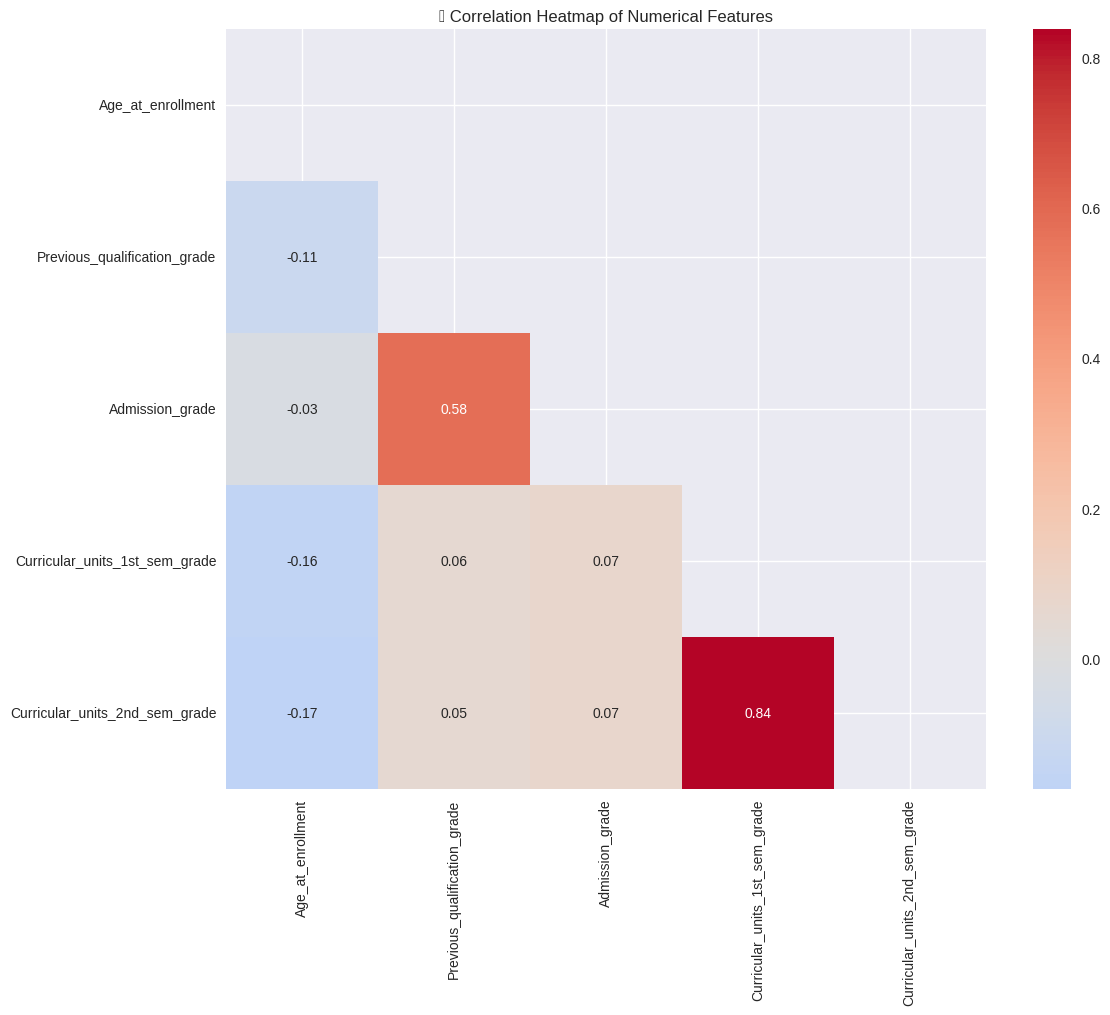

In [23]:
# Correlation analysis for numerical features
print("📈 Correlation Analysis:")
correlation_matrix = df[key_numerical].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('🔥 Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [24]:
# Find high correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > 0.7:  # High correlation threshold
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\n🚨 High correlations (|r| > 0.7) found:")
    for pair in high_corr_pairs:
        print(f"  {pair['Feature 1']} ↔ {pair['Feature 2']}: {pair['Correlation']:.3f}")
else:
    print("✅ No extremely high correlations found")


🚨 High correlations (|r| > 0.7) found:
  Curricular_units_1st_sem_grade ↔ Curricular_units_2nd_sem_grade: 0.837



📊 Target vs Numerical Features Analysis:


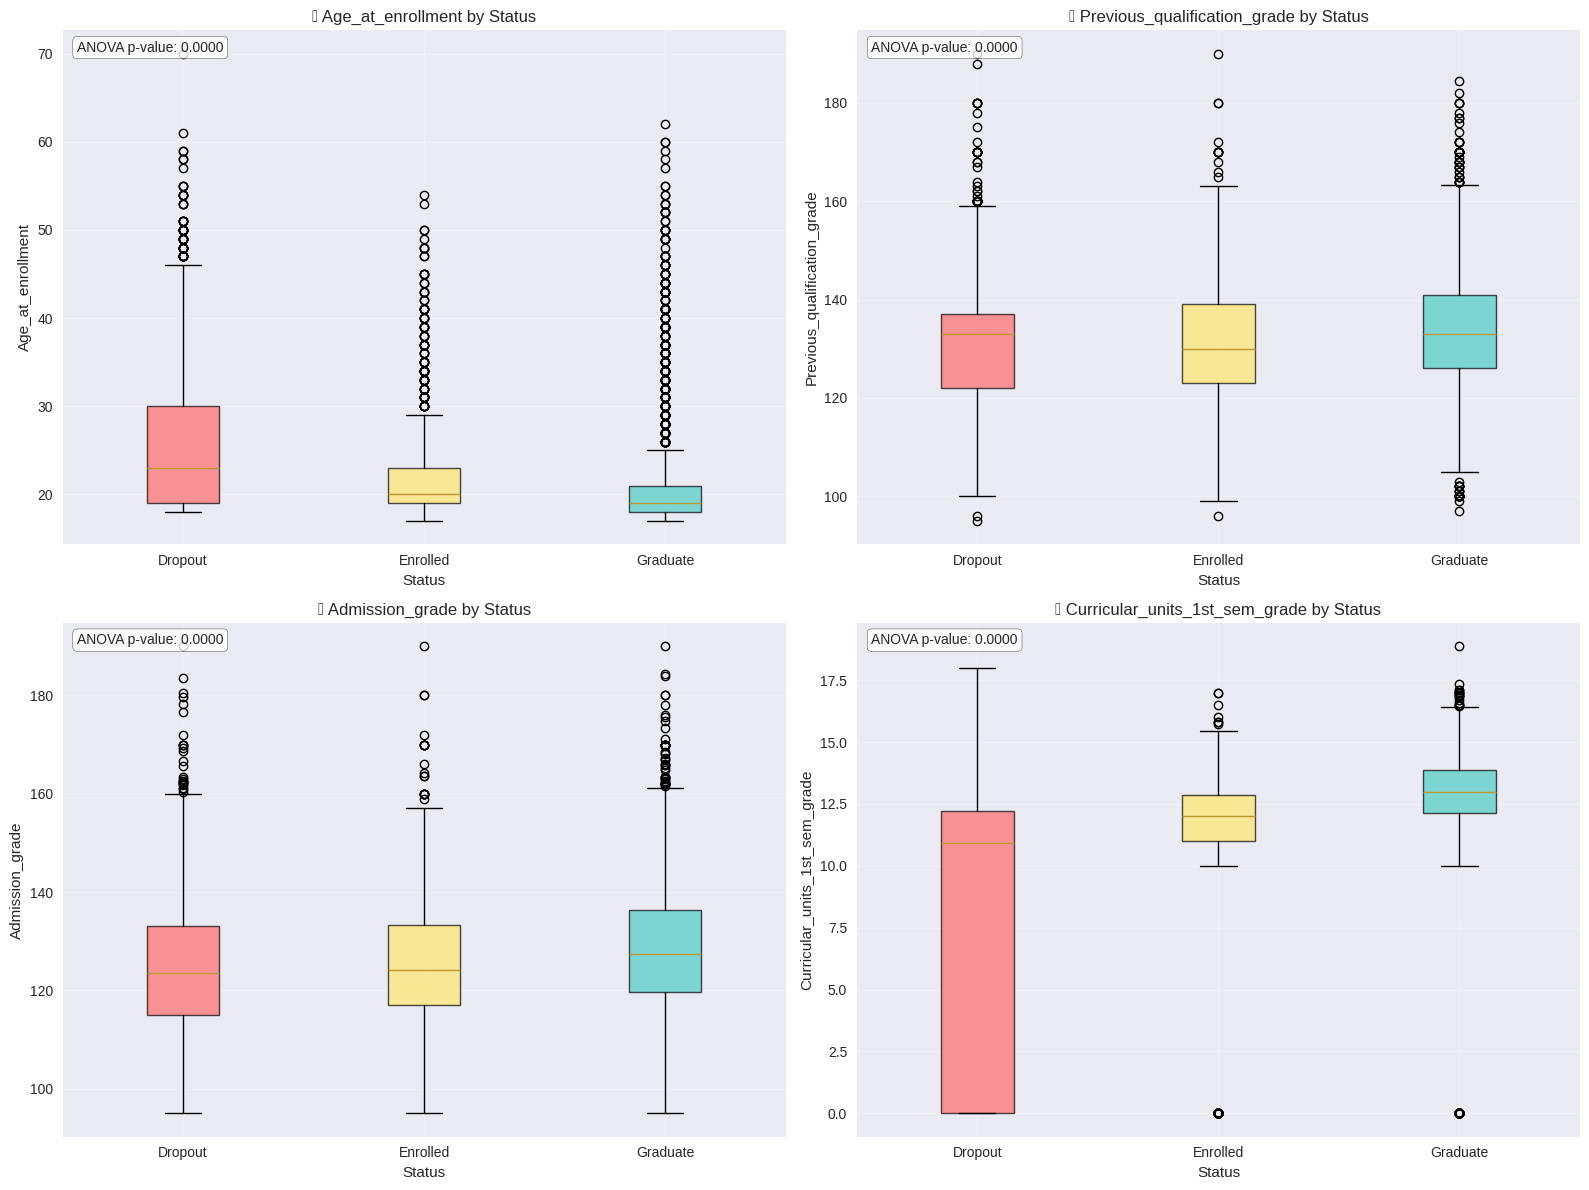

In [25]:
# Target vs Numerical Features Analysis
print("\n📊 Target vs Numerical Features Analysis:")

# Select top numerical features for analysis
analysis_features = key_numerical[:4]  # Top 4 features

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(analysis_features):
    # Box plot by status
    status_order = ['Dropout', 'Enrolled', 'Graduate']
    box_data = [df[df['Status'] == status][col].dropna() for status in status_order]

    bp = axes[i].boxplot(box_data, labels=status_order, patch_artist=True)

    # Color the boxes
    colors = ['#FF6B6B', '#FFE66D', '#4ECDC4']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[i].set_title(f'📦 {col} by Status')
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

    # Statistical test (ANOVA)
    try:
        groups = [df[df['Status'] == status][col].dropna() for status in status_order]
        f_stat, p_value = stats.f_oneway(*groups)
        axes[i].text(0.02, 0.98, f'ANOVA p-value: {p_value:.4f}',
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    except:
        pass

plt.tight_layout()
plt.show()


📊 Target vs Categorical Features Analysis:


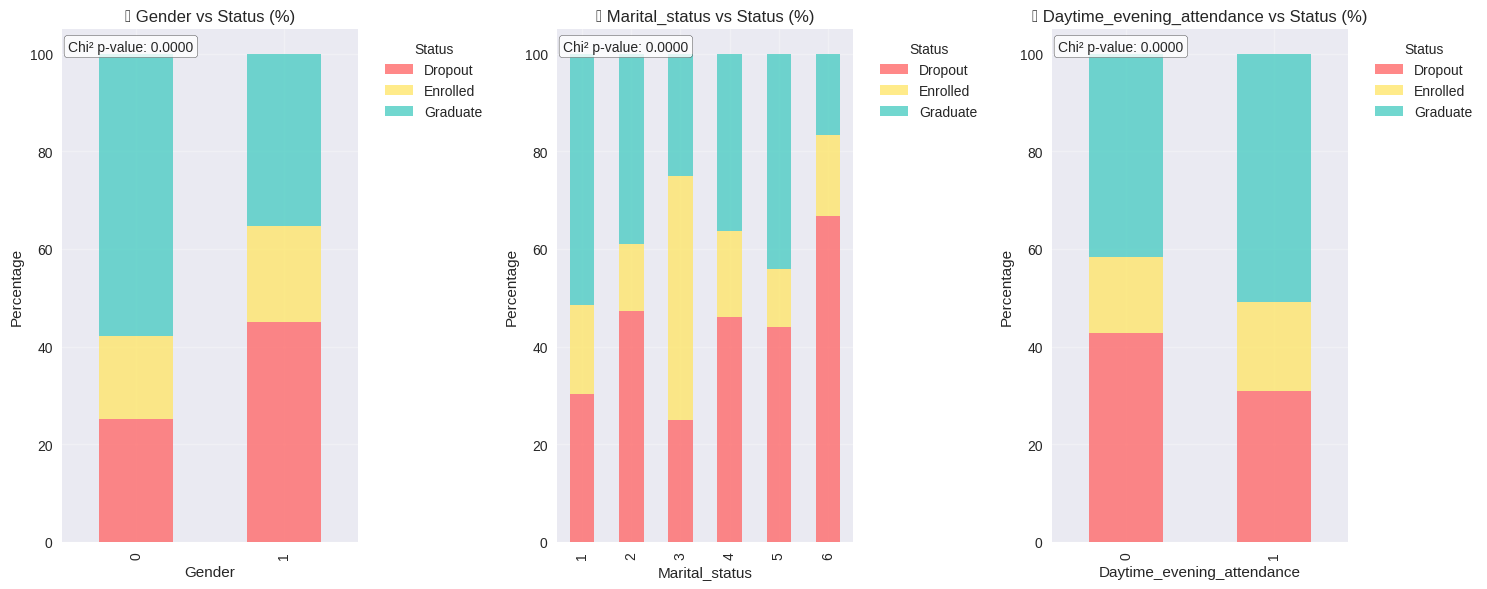

In [26]:
# Target vs Categorical Features Analysis
print("\n📊 Target vs Categorical Features Analysis:")

analysis_categorical = ['Gender', 'Marital_status', 'Daytime_evening_attendance']
analysis_categorical = [col for col in analysis_categorical if col in df.columns]

fig, axes = plt.subplots(1, len(analysis_categorical), figsize=(5*len(analysis_categorical), 6))
if len(analysis_categorical) == 1:
    axes = [axes]

for i, col in enumerate(analysis_categorical):
    # Cross-tabulation
    crosstab = pd.crosstab(df[col], df['Status'])
    crosstab_pct = pd.crosstab(df[col], df['Status'], normalize='index') * 100

    # Stacked bar plot
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[i],
                     color=['#FF6B6B', '#FFE66D', '#4ECDC4'], alpha=0.8)
    axes[i].set_title(f'📊 {col} vs Status (%)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

    # Chi-square test
    try:
        chi2, p_value, dof, expected = chi2_contingency(crosstab)
        axes[i].text(0.02, 0.98, f'Chi² p-value: {p_value:.4f}',
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    except:
        pass

plt.tight_layout()
plt.show()

## Data Preprocessing

In [27]:
# Create a copy for preprocessing
df_processed = df.copy()

# Outlier Handling
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'Status' in numerical_features:
    numerical_features.remove('Status')

outliers_removed = 0
for col in numerical_features:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)
    outliers_count = outliers_mask.sum()

    if outliers_count > 0:
        # Cap outliers instead of removing them to preserve data
        df_processed.loc[df_processed[col] < lower_bound, col] = lower_bound
        df_processed.loc[df_processed[col] > upper_bound, col] = upper_bound
        #print(f"   - {col}: Capped {outliers_count} outliers")
        outliers_removed += outliers_count

print(f"   - Total outliers handled: {outliers_removed}")

   - Total outliers handled: 10714


In [28]:
# Encoding Categorical
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'Status' in categorical_features:
    categorical_features.remove('Status')

# Use Label Encoding for binary variables, One-Hot for others
label_encoders = {}
encoded_features = []

for col in categorical_features:
    unique_values = df_processed[col].nunique()
    if unique_values == 2:
        # Binary encoding
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        encoded_features.append(col + '_encoded')
        print(f"   - {col}: Label encoded (binary)")
    else:
        # One-hot encoding
        dummies = pd.get_dummies(df_processed[col], prefix=col)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        encoded_features.extend(dummies.columns.tolist())
        print(f"   - {col}: One-hot encoded ({unique_values} categories)")

# Drop original categorical columns
df_processed = df_processed.drop(columns=categorical_features)

# Encode target variable
target_encoder = LabelEncoder()
df_processed['Status_encoded'] = target_encoder.fit_transform(df_processed['Status'])
print(f"Target variable encoded: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

Target variable encoded: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


In [29]:
# Scaling
feature_columns = [col for col in df_processed.columns if col not in ['Status', 'Status_encoded']]
X = df_processed[feature_columns]
y = df_processed['Status_encoded']

# Use RobustScaler to handle outliers better
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print(f"   - Applied RobustScaler to {len(feature_columns)} features")
print(f"   - Final dataset shape: {X_scaled_df.shape}")

   - Applied RobustScaler to 36 features
   - Final dataset shape: (4424, 36)


In [30]:
# Use SelectKBest for initial feature selection
selector = SelectKBest(score_func=f_classif, k=min(20, len(feature_columns)))
X_selected = selector.fit_transform(X_scaled, y)
selected_features = [feature_columns[i] for i in selector.get_support(indices=True)]

print(f"Selected top {len(selected_features)} features:")
feature_scores = dict(zip(selected_features, selector.scores_[selector.get_support()]))
for feature, score in sorted(feature_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score:.2f}")

Selected top 20 features:
Curricular_units_2nd_sem_approved: 1514.12
Curricular_units_2nd_sem_grade: 1180.37
Curricular_units_1st_sem_approved: 1090.19
Curricular_units_1st_sem_grade: 788.81
Age_at_enrollment: 208.86
Gender: 123.04
Application_mode: 114.53
Curricular_units_2nd_sem_enrolled: 106.24
Curricular_units_2nd_sem_evaluations: 98.47
Curricular_units_1st_sem_enrolled: 84.40
Curricular_units_1st_sem_evaluations: 52.94
Admission_grade: 37.87
Previous_qualification_grade: 30.02
Displaced: 29.24
Application_order: 23.09
Mothers_qualification: 12.82
Unemployment_rate: 5.92
GDP: 4.80
Fathers_qualification: 3.84
Fathers_occupation: 3.20


## Modeling

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target classes in training: {np.unique(y_train)}")
print(f"Target classes in test: {np.unique(y_test)}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

Training set size: (3539, 20)
Test set size: (885, 20)
Target classes in training: [0 1 2]
Target classes in test: [0 1 2]
Training target distribution: [1137  635 1767]
Test target distribution: [284 159 442]


In [32]:
# Check if we have a multi-class problem
n_classes = len(np.unique(y))
print(f"Number of classes: {n_classes}")
if n_classes > 2:
    print("⚠️  Multi-class classification detected!")
    # For multi-class, we need to adjust our approach
    scoring_metric = 'accuracy'  # Use accuracy for multi-class
else:
    print("✅ Binary classification detected!")
    scoring_metric = 'roc_auc'  # Use AUC for binary

Number of classes: 3
⚠️  Multi-class classification detected!


In [33]:
# Define models and their search spaces
models_config = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': Integer(50, 300),
            'max_depth': Integer(3, 20),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 10),
            'max_features': Categorical(['sqrt', 'log2', None])
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': Integer(50, 200),
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'max_depth': Integer(3, 10),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 10)
        }
    }
}

# Add LogisticRegression with proper multi-class handling
if n_classes > 2:
    # Multi-class configuration
    models_config['LogisticRegression'] = {
        'model': LogisticRegression(
            random_state=RANDOM_STATE,
            max_iter=2000,
            multi_class='ovr',  # One-vs-Rest for multi-class
            solver='liblinear'
        ),
        'params': {
            'C': Real(0.001, 100, prior='log-uniform'),
            'penalty': Categorical(['l1', 'l2'])
        }
    }

    models_config['SVM'] = {
        'model': SVC(
            random_state=RANDOM_STATE,
            probability=True,
            decision_function_shape='ovr'  # One-vs-Rest for multi-class SVM
        ),
        'params': {
            'C': Real(0.1, 100, prior='log-uniform'),
            'gamma': Real(0.001, 1, prior='log-uniform'),
            'kernel': Categorical(['rbf', 'linear'])
        }
    }
else:
    # Binary classification configuration
    models_config['LogisticRegression'] = {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=2000),
        'params': {
            'C': Real(0.001, 100, prior='log-uniform'),
            'penalty': Categorical(['l1', 'l2']),
            'solver': Categorical(['liblinear', 'lbfgs'])
        }
    }

    models_config['SVM'] = {
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'params': {
            'C': Real(0.1, 100, prior='log-uniform'),
            'gamma': Real(0.001, 1, prior='log-uniform'),
            'kernel': Categorical(['rbf', 'linear', 'poly'])
        }
    }

In [34]:
# Train models with Bayesian Optimization
trained_models = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for model_name, config in models_config.items():
    print(f"\n🔍 Training {model_name}...")

    try:
        # Bayesian optimization with appropriate scoring metric
        bayes_search = BayesSearchCV(
            config['model'],
            config['params'],
            n_iter=20,  # Reduced iterations for faster training
            cv=cv,
            scoring=scoring_metric,  # Use appropriate metric (accuracy for multi-class, roc_auc for binary)
            random_state=RANDOM_STATE,
            n_jobs=1,  # Use single job for stability
            verbose=0
        )

        bayes_search.fit(X_train, y_train)

        trained_models[model_name] = {
            'model': bayes_search.best_estimator_,
            'best_params': bayes_search.best_params_,
            'best_score': bayes_search.best_score_
        }

        print(f"   ✅ Best CV Score ({scoring_metric}): {bayes_search.best_score_:.4f}")
        print(f"   📋 Best Parameters: {bayes_search.best_params_}")

    except Exception as e:
        print(f"   ❌ Error training {model_name}: {str(e)}")
        print(f"   ⏭️  Trying alternative configuration...")

        # Fallback: Simple model without hyperparameter tuning
        try:
            simple_model = config['model']
            simple_model.fit(X_train, y_train)

            # Calculate cross-validation score manually
            cv_scores = cross_val_score(simple_model, X_train, y_train, cv=cv, scoring=scoring_metric)

            trained_models[model_name] = {
                'model': simple_model,
                'best_params': 'default',
                'best_score': cv_scores.mean()
            }

            print(f"   ✅ Fallback model trained successfully!")
            print(f"   📊 CV Score ({scoring_metric}): {cv_scores.mean():.4f}")

        except Exception as e2:
            print(f"   ❌ Fallback also failed: {str(e2)}")
            print(f"   ⏭️  Skipping {model_name}...")
            continue

print(f"\n🎯 Successfully trained {len(trained_models)} models!")


🔍 Training RandomForest...
   ✅ Best CV Score (accuracy): 0.7446
   📋 Best Parameters: OrderedDict([('max_depth', 13), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])

🔍 Training GradientBoosting...
   ✅ Best CV Score (accuracy): 0.7460
   📋 Best Parameters: OrderedDict([('learning_rate', 0.05043836586977973), ('max_depth', 3), ('min_samples_leaf', 10), ('min_samples_split', 20), ('n_estimators', 200)])

🔍 Training LogisticRegression...
   ✅ Best CV Score (accuracy): 0.7324
   📋 Best Parameters: OrderedDict([('C', 1.2172976749510152), ('penalty', 'l2')])

🔍 Training SVM...
   ✅ Best CV Score (accuracy): 0.7412
   📋 Best Parameters: OrderedDict([('C', 2.1602177830877722), ('gamma', 0.5703843027403095), ('kernel', 'rbf')])

🎯 Successfully trained 4 models!


## Evaluasi Model

In [35]:
# Evaluate all models
model_results = {}

for model_name, model_info in trained_models.items():
    model = model_info['model']

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics based on problem type
    accuracy = accuracy_score(y_test, y_pred)

    # For AUC calculation
    if n_classes == 2:
        # Binary classification
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        auc_score = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0
    else:
        # Multi-class classification
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
        if y_pred_proba is not None:
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        else:
            auc_score = 0

    model_results[model_name] = {
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n📈 {model_name} Results:")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - AUC Score: {auc_score:.4f}")
    print("\n   Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


📈 RandomForest Results:
   - Accuracy: 0.7299
   - AUC Score: 0.8870

   Classification Report:
              precision    recall  f1-score   support

     Dropout       0.76      0.68      0.72       284
    Enrolled       0.45      0.32      0.38       159
    Graduate       0.78      0.91      0.84       442

    accuracy                           0.73       885
   macro avg       0.66      0.64      0.64       885
weighted avg       0.71      0.73      0.72       885


📈 GradientBoosting Results:
   - Accuracy: 0.7458
   - AUC Score: 0.8900

   Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.71      0.73       284
    Enrolled       0.51      0.35      0.42       159
    Graduate       0.79      0.91      0.85       442

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.73      0.75      0.73       885


📈 LogisticRegression Results:
   - Accu

In [36]:
# Select best model
if len(trained_models) > 0:
    best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
    best_model = trained_models[best_model_name]['model']

    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   - AUC Score: {model_results[best_model_name]['auc_score']:.4f}")
    print(f"   - Accuracy: {model_results[best_model_name]['accuracy']:.4f}")
else:
    print("❌ No models were successfully trained!")
    best_model_name = None
    best_model = None


🏆 BEST MODEL: GradientBoosting
   - AUC Score: 0.8900
   - Accuracy: 0.7458


🔝 TOP 10 MOST IMPORTANT FEATURES:
   Curricular_units_2nd_sem_approved: 0.6172
   Curricular_units_1st_sem_approved: 0.0500
   Curricular_units_2nd_sem_enrolled: 0.0487
   Curricular_units_2nd_sem_grade: 0.0388
   Age_at_enrollment: 0.0385
   Curricular_units_1st_sem_evaluations: 0.0345
   Curricular_units_1st_sem_enrolled: 0.0332
   Curricular_units_2nd_sem_evaluations: 0.0245
   Admission_grade: 0.0234
   Curricular_units_1st_sem_grade: 0.0187


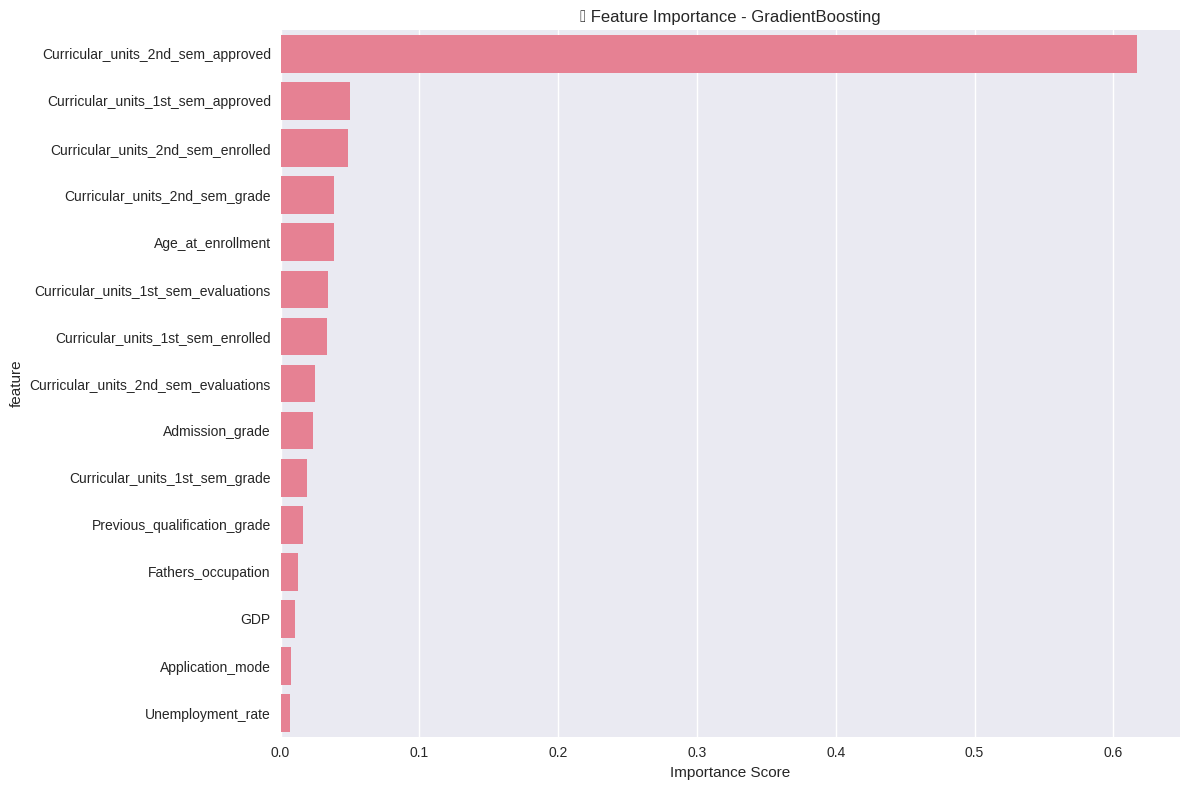

In [37]:
# Feature importance analysis
if best_model is not None and hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': [selected_features[i] for i in range(len(selected_features))],
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("🔝 TOP 10 MOST IMPORTANT FEATURES:")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f}")

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'🎯 Feature Importance - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Feature importance analysis not available for this model type.")

In [38]:
# ROC Curve Analysis
if len(model_results) > 0:
    plt.figure(figsize=(10, 8))

    for model_name, results in model_results.items():
        if results['probabilities'] is not None:
            if n_classes == 2:
                # Binary classification ROC
                fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
                plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc_score']:.3f})")
            else:
                # Multi-class ROC (simplified - show average)
                print(f"Multi-class ROC for {model_name}: AUC = {results['auc_score']:.3f}")

    if n_classes == 2:
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('📈 ROC Curve Comparison')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("📊 Multi-class ROC curves are complex - showing AUC scores above")
else:
    print("⚠️  No models available for ROC analysis")

Multi-class ROC for RandomForest: AUC = 0.887
Multi-class ROC for GradientBoosting: AUC = 0.890
Multi-class ROC for LogisticRegression: AUC = 0.884
Multi-class ROC for SVM: AUC = 0.868
📊 Multi-class ROC curves are complex - showing AUC scores above


<Figure size 1000x800 with 0 Axes>

In [39]:
# Calculate dropout statistics
dropout_rate = (df['Status'] == 'Dropout').mean() * 100
total_students = len(df)
dropout_students = (df['Status'] == 'Dropout').sum()

print(f"📊 CURRENT SITUATION:")
print(f"   - Total Students: {total_students:,}")
print(f"   - Dropout Students: {dropout_students:,}")
print(f"   - Dropout Rate: {dropout_rate:.2f}%")

print(f"\n🎯 MODEL PERFORMANCE:")
if best_model_name:
    print(f"   - Best Model: {best_model_name}")
    print(f"   - Prediction Accuracy: {model_results[best_model_name]['accuracy']:.1%}")
    print(f"   - AUC Score: {model_results[best_model_name]['auc_score']:.3f}")
else:
    print("   - No models were successfully trained")

print(f"\n💡 KEY RECOMMENDATIONS:")
print("   1. 🚨 Implement early warning system using this model")
print("   2. 👥 Focus intervention programs on high-risk students")
print("   3. 📈 Monitor top risk factors identified by the model")
print("   4. 🎓 Develop targeted retention strategies")
print("   5. 📊 Regular model retraining with new data")

print(f"\n🔮 POTENTIAL IMPACT:")
if best_model_name and model_results[best_model_name]['accuracy'] > 0.8:
    estimated_prevention = int(dropout_students * model_results[best_model_name]['accuracy'] * 0.5)
    print(f"   - Potential students saved from dropout: ~{estimated_prevention}")
    print(f"   - Estimated improvement in retention rate: +{estimated_prevention/total_students*100:.1f}%")
else:
    print("   - Model performance needs improvement for reliable predictions")

📊 CURRENT SITUATION:
   - Total Students: 4,424
   - Dropout Students: 1,421
   - Dropout Rate: 32.12%

🎯 MODEL PERFORMANCE:
   - Best Model: GradientBoosting
   - Prediction Accuracy: 74.6%
   - AUC Score: 0.890

💡 KEY RECOMMENDATIONS:
   1. 🚨 Implement early warning system using this model
   2. 👥 Focus intervention programs on high-risk students
   3. 📈 Monitor top risk factors identified by the model
   4. 🎓 Develop targeted retention strategies
   5. 📊 Regular model retraining with new data

🔮 POTENTIAL IMPACT:
   - Model performance needs improvement for reliable predictions


In [40]:
# Save model and preprocessors for future use
import joblib

if best_model is not None:
    # Create a model package
    model_package = {
        'model': best_model,
        'scaler': scaler,
        'feature_selector': selector,
        'target_encoder': target_encoder,
        'selected_features': selected_features,
        'feature_columns': feature_columns,
        'n_classes': n_classes,
        'best_model_name': best_model_name
    }

    # Save the package
    joblib.dump(model_package, 'student_dropout_model.pkl')
    print("💾 Model saved as 'student_dropout_model.pkl'")

    print(f"\n🎉 Project completed successfully!")
    print(f"📋 Summary:")
    print(f"   - Dataset processed: {len(df_processed):,} records")
    print(f"   - Features used: {len(selected_features)}")
    print(f"   - Best model: {best_model_name}")
    print(f"   - Model accuracy: {model_results[best_model_name]['accuracy']:.1%}")
    print(f"   - Number of classes: {n_classes}")
else:
    print("❌ No model was successfully trained - cannot save model package")
    print("🔍 Please check the data and model configurations")

💾 Model saved as 'student_dropout_model.pkl'

🎉 Project completed successfully!
📋 Summary:
   - Dataset processed: 4,424 records
   - Features used: 20
   - Best model: GradientBoosting
   - Model accuracy: 74.6%
   - Number of classes: 3
